In [1]:
from SwapClass import SwapCore
import utilities

In [2]:
#files = utilities.getFileNames()
#files = utilities.getFileNames(data_dir="data 12-8-2022")
#files = utilities.getFileNames(data_dir="data 11-8-2022")
files = utilities.getFileNames(data_dir="data 16-8-2022")
print(files)

['data 16-8-2022/0_5_130_v3_low_bandwidth_avr_1_res_high.csv', 'data 16-8-2022/0_5_130_v3_low_bandwidth_avr_1_res_high_att_10.csv']


Found signals count (including ones with signal being higher or lower than both ref signals): 848


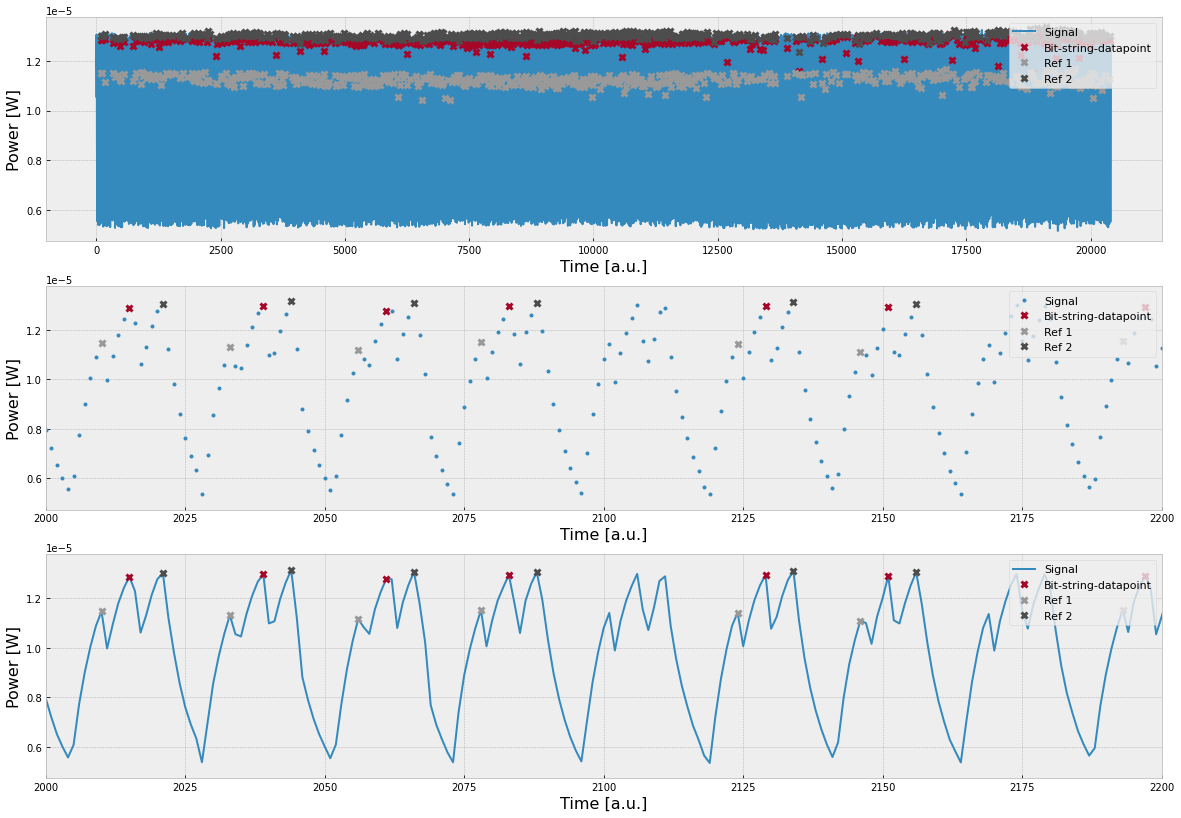

In [5]:
#signal = SwapCore('./data/test1.csv')
signal = SwapCore(files[1])
signal.set_parameters(horizontal_distance=1,max_peak_distance=8, number_of_peaks_per_signal=3,min_height_peak=1*10**(-6),analysis_without_correction=True)

x = 2000
y = 2200
signal.plot(x_lim=[x,y])

Time interval counts:
3.000    14506
2.000     4269
4.000      397
5.000      343
6.000      163
         ...  
5.179        1
3.067        1
5.623        1
1.630        1
2.685        1
Name: interval, Length: 493, dtype: int64
Interval mean = 2.939510068100534, std = 0.9129823757640122


,ref1,ref2,dataPoint,Pn
count,5.420000e+02,5.420000e+02,5.420000e+02,542.000000
mean,1.124313e-05,1.302671e-05,1.278860e-05,0.866258
std,2.008197e-07,1.047291e-07,1.797506e-07,0.100813
min,1.042400e-05,1.237300e-05,1.150200e-05,0.087842
25%,1.111350e-05,1.296325e-05,1.273325e-05,0.839192
50%,1.126050e-05,1.303000e-05,1.280900e-05,0.879267
75%,1.139675e-05,1.309875e-05,1.289600e-05,0.921369
max,1.166300e-05,1.335500e-05,1.330000e-05,0.997695


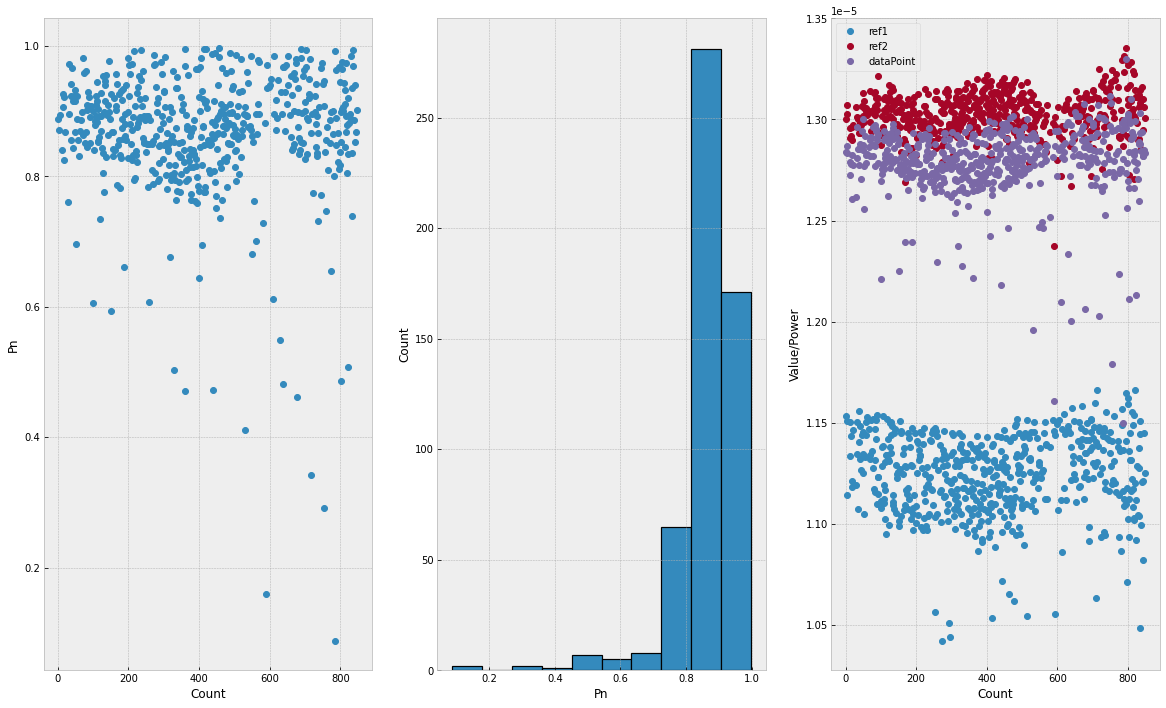

In [6]:
peaks = signal.analyze_peaks()
peaks.drop(['ref1_index','ref2_index','dataPoint_index'],axis=1, inplace=True)
utilities.plotStats(peaks)
signal.calculate_time_interval()
peaks.describe()